## Language Modelling using Graph Network - Task 1

### Importing Libraries

In [116]:
import pandas as pd
import numpy as np
import networkx as nx
import heapq
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [2]:
from google.colab import files

uploaded=files.upload()
df = pd.read_csv('DatasetProject3.csv')

Saving DatasetProject3.csv to DatasetProject3.csv


Removing all the rows where Keyword 1 is null/na 

In [3]:
df = df[df['Keyword 1'].notna()]

In [4]:
# Converting all the dataset to lower 
for col in df.columns:
  df[str(col)] = df[str(col)].str.lower()

In [5]:
df.head(5)

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
2,meta-analyses of financial performance and equ...,equity,organizational sociology,performance,meta-analysis,psychometrics,organizational research,financial performance,agency theory,organizational effectiveness,organizational behavior,corporate governance,NaN
3,"home country environments, corporate diversifi...",diversification in industry,business planning,performance standards,employees -- rating of,corporate culture,strategic planning,organizational effectiveness,management science,management research,product management,NaN,NaN
4,safeguarding investments in asymmetric interor...,interorganizational relations,intergroup relations,business communication,investments,supply chains,knowledge management,interorganizational networks,corporate governance,group decision making,intellectual capital,NaN,NaN
5,managerialist and human capital explanations f...,executive compensation,wages,human capital,labor economics,personnel management,management science,contingency theory (management),compensation management,executive ability (management),corporate governance,NaN,NaN
6,bidding wars over r&d-intensive firms: knowled...,knowledge management,information resources management,management information systems,break-even analysis,data mining,management science,research & development,research & development contracts,corporate governance,decision making,organizational behavior,transaction costs


### Set of Unique Keywords in all the articles

In [6]:
Keywords_unique = set()
for col in range(1,13):
  x = set(df.iloc[:,col].unique())
  Keywords_unique = Keywords_unique.union(x)

# Removing Null values from the keywords set
Keywords_unique.remove(np.nan)

In [7]:
Keywords_unique

{'agency theory',
 'aggression (psychology)',
 'ambivalence',
 'anger in the workplace',
 'behavioral research',
 'boards of directors',
 'break-even analysis',
 'burnout (psychology)',
 'business communication',
 'business enterprises',
 'business enterprises -- valuation',
 'business models',
 'business networks',
 'business planning',
 'capital investments',
 'capital market',
 'capitalists & financiers',
 'charismatic authority',
 'chief executive officers',
 'commercial products',
 'compensation management',
 'competitive advantage',
 'conduct of life',
 'conflict management',
 'consolidation & merger of corporations',
 'contagion (social psychology)',
 'contingency theory (management)',
 'corporate culture',
 'corporate governance',
 'corporate image',
 'corporations -- finance',
 'corporations -- investor relations',
 'corporations -- public relations',
 'corporations -- valuation',
 'creative ability',
 'creative ability in business',
 'critical incident technique',
 'critical 

In [8]:
len(Keywords_unique)

248

So there are 248 unique keywords present in all the articles combined

### Weighted Adjacency Matrix

Creating zero matrix of 248 X 248

In [9]:
Z_matrix = np.zeros((len(Keywords_unique),len(Keywords_unique)),dtype=int)
Z_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# Creating a Dataframe with index and columns as the unique words
Keywords_unique = list(Keywords_unique)
Keywords_unique.sort()
KeywordsMatrix = pd.DataFrame(Z_matrix)

KeywordsMatrix.columns = Keywords_unique
KeywordsMatrix.index = Keywords_unique

In [11]:
KeywordsMatrix

,agency theory,aggression (psychology),ambivalence,anger in the workplace,behavioral research,boards of directors,break-even analysis,burnout (psychology),business communication,business enterprises,...,violence in the workplace,wage payment systems,wages,women -- employment,women employees,work & family,work attitudes,work environment,work environment -- psychological aspects,workflow
agency theory,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aggression (psychology),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ambivalence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anger in the workplace,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
behavioral research,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
work & family,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
work attitudes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
work environment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
work environment -- psychological aspects,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Assigning weights to links on the basis of occurence in the articles

In [12]:
for i in KeywordsMatrix.columns:
  for j in KeywordsMatrix.index:
    weight = 0
    if i == j:
      KeywordsMatrix[i][j] = 0
      KeywordsMatrix[j][i] = 0
    else:
      for k in range(0, len(df)):
        if ((i in list(df.iloc[int(k),1:])) & (j in list(df.iloc[int(k),1:]))):
          weight = weight +1
        
      KeywordsMatrix[i][j] = weight
      KeywordsMatrix[j][i] = weight

KeywordsMatrix

,agency theory,aggression (psychology),ambivalence,anger in the workplace,behavioral research,boards of directors,break-even analysis,burnout (psychology),business communication,business enterprises,...,violence in the workplace,wage payment systems,wages,women -- employment,women employees,work & family,work attitudes,work environment,work environment -- psychological aspects,workflow
agency theory,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aggression (psychology),0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,2,0,0
ambivalence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anger in the workplace,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
behavioral research,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
work & family,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
work attitudes,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
work environment,0,2,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
work environment -- psychological aspects,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
|# Converting the KeywordsMatrix df to a matrix
KeywordsMatrixFinal = KeywordsMatrix.to_numpy()

In [132]:
KeywordsMatrixFinal

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Creating a weighted network

{(0, 5): Text(0.1384523904877677, 0.09800878184434952, '1'),
 (0, 28): Text(0.11300013098043381, -0.08817385356566765, '3'),
 (0, 30): Text(0.18183818864347717, 0.019761411169649037, '1'),
 (0, 45): Text(0.05970074482822757, 0.013686311011682953, '1'),
 (0, 47): Text(0.09698133668630649, -0.046506674397496714, '1'),
 (0, 50): Text(0.09526999042293313, 0.025014242313830454, '1'),
 (0, 57): Text(0.03844361783775419, 0.015487322759407202, '1'),
 (0, 60): Text(0.06552426070560778, -0.34352318831168516, '1'),
 (0, 66): Text(-0.015686100266048136, -0.3543787123446907, '1'),
 (0, 68): Text(0.14687364274500625, -0.263872464584212, '1'),
 (0, 70): Text(0.017319184107403365, -0.0609818862098568, '1'),
 (0, 73): Text(0.2041382270914176, -0.08473557729025065, '1'),
 (0, 75): Text(0.02276155656920897, -0.1959646821109378, '1'),
 (0, 76): Text(0.1425082776057158, -0.07625232620713546, '1'),
 (0, 78): Text(0.08967174943097396, -0.19913916539766544, '1'),
 (0, 80): Text(0.009174303981368093, -0.343708

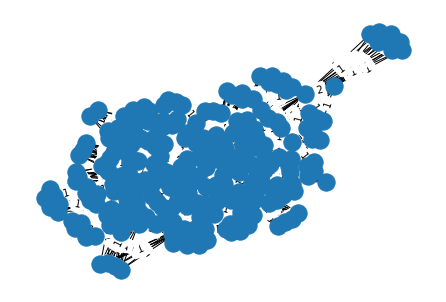

In [106]:
G = nx.from_numpy_matrix(KeywordsMatrixFinal, parallel_edges=False)
pos=nx.spring_layout(G)
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

### Degree and Strengths of all the nodes

In [77]:
# Degree of all the nodes

G.degree

DegreeView({0: 38, 1: 18, 2: 9, 3: 11, 4: 9, 5: 21, 6: 11, 7: 11, 8: 9, 9: 9, 10: 9, 11: 9, 12: 27, 13: 29, 14: 9, 15: 9, 16: 17, 17: 9, 18: 32, 19: 9, 20: 19, 21: 37, 22: 9, 23: 10, 24: 9, 25: 10, 26: 9, 27: 9, 28: 62, 29: 9, 30: 28, 31: 9, 32: 9, 33: 9, 34: 15, 35: 23, 36: 9, 37: 10, 38: 7, 39: 11, 40: 11, 41: 11, 42: 19, 43: 19, 44: 11, 45: 10, 46: 25, 47: 90, 48: 9, 49: 10, 50: 10, 51: 18, 52: 11, 53: 8, 54: 9, 55: 9, 56: 35, 57: 10, 58: 10, 59: 9, 60: 11, 61: 9, 62: 17, 63: 31, 64: 9, 65: 9, 66: 11, 67: 9, 68: 10, 69: 9, 70: 46, 71: 31, 72: 18, 73: 14, 74: 9, 75: 27, 76: 16, 77: 11, 78: 19, 79: 11, 80: 11, 81: 9, 82: 9, 83: 11, 84: 9, 85: 26, 86: 27, 87: 11, 88: 11, 89: 4, 90: 11, 91: 11, 92: 17, 93: 11, 94: 9, 95: 9, 96: 32, 97: 18, 98: 19, 99: 64, 100: 17, 101: 37, 102: 49, 103: 11, 104: 9, 105: 11, 106: 18, 107: 11, 108: 20, 109: 20, 110: 16, 111: 11, 112: 11, 113: 18, 114: 24, 115: 32, 116: 20, 117: 25, 118: 9, 119: 20, 120: 18, 121: 20, 122: 10, 123: 19, 124: 17, 125: 9, 126:

In [78]:
# Strengths of all the nodes

G.degree(weight='weight')

DegreeView({0: 48, 1: 20, 2: 9, 3: 11, 4: 9, 5: 21, 6: 11, 7: 11, 8: 9, 9: 9, 10: 9, 11: 9, 12: 29, 13: 31, 14: 9, 15: 9, 16: 18, 17: 9, 18: 37, 19: 9, 20: 20, 21: 42, 22: 9, 23: 10, 24: 9, 25: 10, 26: 9, 27: 9, 28: 85, 29: 9, 30: 30, 31: 9, 32: 9, 33: 9, 34: 16, 35: 26, 36: 9, 37: 10, 38: 7, 39: 11, 40: 11, 41: 11, 42: 20, 43: 20, 44: 11, 45: 10, 46: 29, 47: 112, 48: 9, 49: 10, 50: 10, 51: 20, 52: 11, 53: 8, 54: 9, 55: 9, 56: 44, 57: 10, 58: 10, 59: 9, 60: 11, 61: 9, 62: 17, 63: 38, 64: 9, 65: 9, 66: 11, 67: 9, 68: 10, 69: 9, 70: 57, 71: 36, 72: 19, 73: 14, 74: 9, 75: 31, 76: 19, 77: 11, 78: 21, 79: 11, 80: 11, 81: 9, 82: 9, 83: 11, 84: 9, 85: 27, 86: 30, 87: 11, 88: 11, 89: 4, 90: 11, 91: 11, 92: 18, 93: 11, 94: 9, 95: 9, 96: 35, 97: 19, 98: 22, 99: 84, 100: 19, 101: 49, 102: 59, 103: 11, 104: 9, 105: 11, 106: 18, 107: 11, 108: 20, 109: 20, 110: 17, 111: 11, 112: 11, 113: 19, 114: 27, 115: 36, 116: 21, 117: 25, 118: 9, 119: 21, 120: 18, 121: 20, 122: 10, 123: 20, 124: 18, 125: 9, 126

### Top 10 nodes by Degree & Strength

In [88]:
Matdegree = {node:val for (node, val) in G.degree()}
DegreeMat = {Keywords_unique[x]:G.degree(x) for x in Matdegree.keys()}

MatWeights = {node:val for (node, val) in G.degree(weight= 'weight')}
WeightsMat = {Keywords_unique[x]:G.degree(x, weight='weight') for x in Matdegree.keys()}

data_items = DegreeMat.items()
data_list = list(data_items)
DegreeMatdf = pd.DataFrame(data_list)
DegreeMatdf.columns = ("nodes", "degree")

data_items_w = WeightsMat.items()
data_list_w = list(data_items_w)
WeightMatdf = pd.DataFrame(data_list_w)
WeightMatdf.columns = ("nodes", "strength")

Finaldf = pd.merge(DegreeMatdf, WeightMatdf, on = 'nodes')

,nodes,degree,strength
0,agency theory,38,48
1,aggression (psychology),18,20
2,ambivalence,9,9
3,anger in the workplace,11,11
4,behavioral research,9,9
...,...,...,...
243,work & family,9,9
244,work attitudes,11,11
245,work environment,26,31
246,work environment -- psychological aspects,10,10


In [98]:
# Top 10 nodes by Degree

Top10Degree = Finaldf.sort_values(by = 'degree', ascending= False).drop('strength', axis = 1).nlargest(10, 'degree')
Top10Degree

,nodes,degree
154,organizational behavior,166
157,organizational effectiveness,104
135,management science,102
169,personnel management,93
47,decision making,90
162,organizational structure,74
161,organizational sociology,66
220,strategic planning,66
99,industrial management,64
28,corporate governance,62


In [97]:
# Top 10 nodes by Strength

Top10Strength = Finaldf.sort_values(by = 'strength', ascending= False).drop('degree', axis = 1).nlargest(10, 'strength')
Top10Strength

,nodes,strength
154,organizational behavior,265
157,organizational effectiveness,144
135,management science,136
169,personnel management,126
47,decision making,112
162,organizational structure,107
161,organizational sociology,96
28,corporate governance,85
99,industrial management,84
220,strategic planning,80


### Top 10 node pairs by weight

In [206]:
top10nodes = dict(KeywordsMatrix.max().nlargest(30))
top10nodes

results = pd.DataFrame(columns = ['Keyword 1', 'Keyword 2', 'Weight'])

for i, j in top10nodes.items():
  for ind, x in enumerate(KeywordsMatrix[i]):
    if x == j:
      a = KeywordsMatrix[i].index[ind]
      results = results.append({"Keyword 1": i, 'Keyword 2': a, 'Weight': j}, ignore_index=True)


results

# To remove duplicates like a,b and b,a from the table
results = results.loc[pd.DataFrame(np.sort(results[['Keyword 1','Keyword 2']],1),index=results.index).drop_duplicates(keep='first').index].reset_index()
results = results.drop('index', axis = 1)
results.head(10)

,Keyword 1,Keyword 2,Weight
0,organizational behavior,organizational effectiveness,11
1,organizational structure,organizational behavior,9
2,personnel management,organizational behavior,8
3,management science,organizational behavior,7
4,corporate governance,organizational behavior,6
5,decision making,organizational behavior,6
6,organizational sociology,organizational behavior,6
7,industrial management,organizational behavior,5
8,industrial relations,organizational behavior,5
9,management,organizational behavior,5


### Plot of Average Strength vs Degree

Text(0.5, 0, 'Degree')

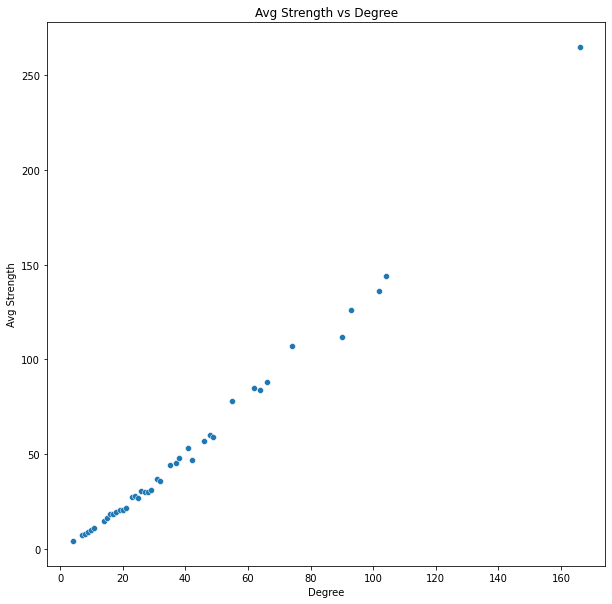

In [123]:
avgStrenth = Finaldf.groupby('degree').mean()
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'degree', y = 'strength', data = avgStrenth)
plt.title('Avg Strength vs Degree')
plt.ylabel('Avg Strength')
plt.xlabel('Degree')
